# Kaggle Playground

In [433]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

dir_path = os.path.join(os.getcwd(), "data/")
train = pd.read_csv(dir_path + "/train.csv")
test = pd.read_csv(dir_path + "/test.csv")

print("train columns:", len(train.columns))
print("test columns:",len(test.columns))

train columns: 21
test columns: 20


## 1. 데이터 전처리

In [434]:
# 데이터 확인
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [435]:

# target 분리
y = train["price"]
train.drop(labels="price", axis="columns", inplace=True)

# date 전처리
train["date"] = train["date"].apply(lambda date: date[:6]).astype(int)

# id column 삭제
train.drop(labels="id", axis="columns", inplace=True)
# waterfront, view, yr_renovated columns 삭제
train.drop(labels=["waterfront", "view", "yr_renovated"], axis="columns", inplace=True)

train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,3,7,1715,0,1995,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,3,7,1060,0,1963,98198,47.4095,-122.315,1650,9711


In [436]:
# 피쳐 갯수 확인
print(len(train.columns))

16


In [437]:
# 데이터 유형 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   condition      15035 non-null  int64  
 7   grade          15035 non-null  int64  
 8   sqft_above     15035 non-null  int64  
 9   sqft_basement  15035 non-null  int64  
 10  yr_built       15035 non-null  int64  
 11  zipcode        15035 non-null  int64  
 12  lat            15035 non-null  float64
 13  long           15035 non-null  float64
 14  sqft_living15  15035 non-null  int64  
 15  sqft_lot15     15035 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 1.8 MB


In [438]:
train.describe() 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,201438.545993,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,3.406651,7.660725,1794.158164,289.632059,1971.100432,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,44.252050,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.646505,1.179803,831.738609,440.663284,29.407612,53.297815,0.138164,0.141294,691.456442,27736.259787
min,201405.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,201407.000000,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,201410.000000,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1570.000000,0.000000,1975.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,201502.000000,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,201505.000000,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [439]:
# train 결측치 확인
train.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [440]:
# test 결측치 확인
test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [441]:

# train, test 모두 분포 확인

# test 전처리
test["date"] = test["date"].apply(lambda date: date[:6]).astype(int)
test.drop(labels="id", axis="columns", inplace=True)
# 25~75% 까지 0인 waterfront, view, yr_renovated 제거
test.drop(labels=["waterfront", "view", "yr_renovated"], axis="columns", inplace=True)

concat = pd.concat([train, test], axis="rows")

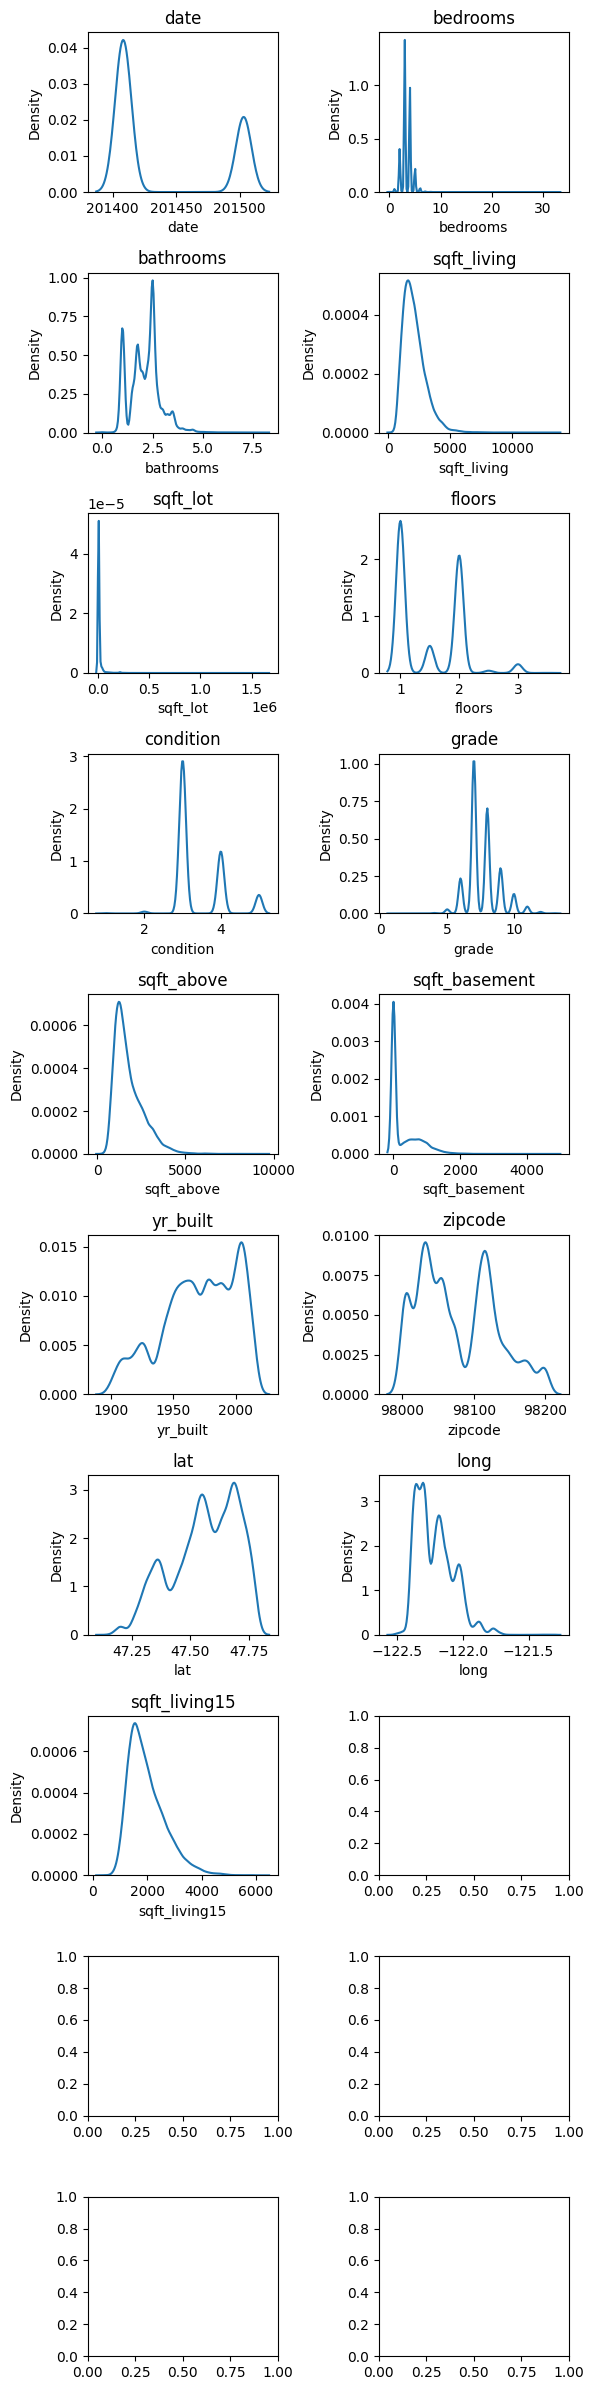

In [442]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(6, 24))

cols = concat.columns

count = 0
for row in range(10):
    for col in range(2):
        if count == 15:
            break
        sns.kdeplot(data=concat[cols[count]], ax=axes[row][col])
        axes[row][col].set_title(cols[count])
        count += 1
plt.tight_layout()
plt.show()

한쪽으로 치우친 분포의 컬럼을 확인할 수 있다  
bedrooms, bathrooms, sqft_living, sqft_lot, waterfront, view, sqft_above, sqft_basement, yr_renovated

In [443]:
# 로그 스케일링

skew_cols = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]

def log_scale(data, cols):
    for col in cols:
        data[col] = np.log1p(data[col])
log_scale(concat, skew_cols)

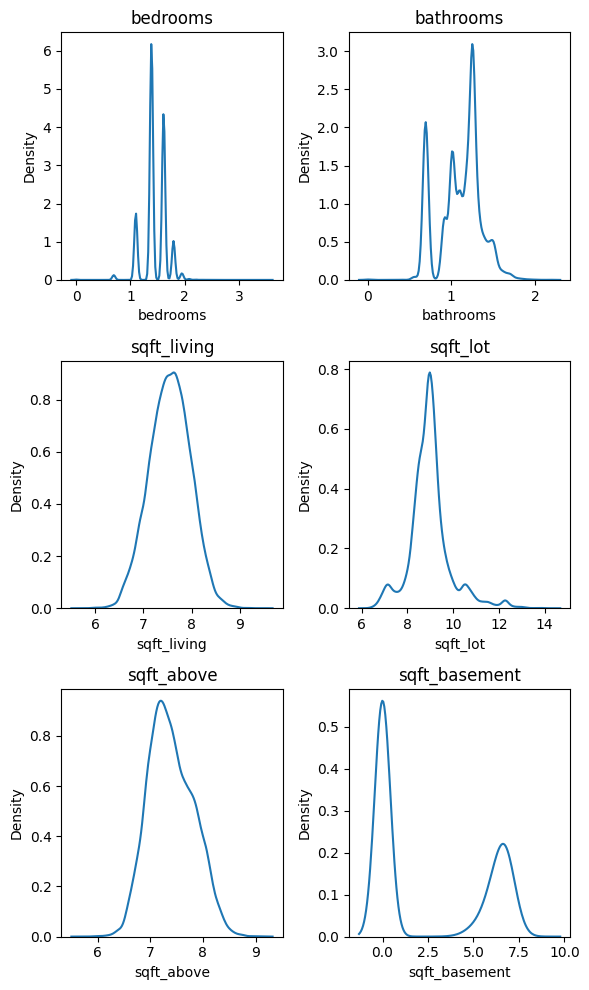

In [444]:
# 로그 변환 시각화

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 10))

count = 0
for row in range(5):
    for col in range(2):
        if count ==6:
            break
        sns.kdeplot(data=concat[skew_cols[count]], ax=axes[row][col])
        axes[row][col].set_title(skew_cols[count])
        count += 1
plt.tight_layout()
plt.show()

In [445]:
log_scale(train, skew_cols)
log_scale(test, skew_cols)

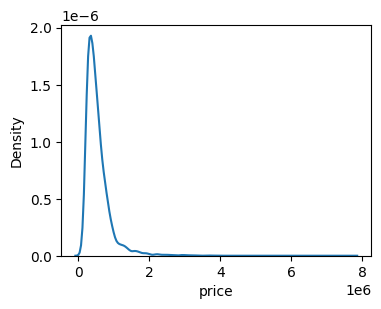

In [446]:
# price 분포 확인
plt.figure(figsize=(4, 3))
sns.kdeplot(data=y)
plt.show()

In [447]:
# target 도 log scale 변환
print(y)
y = np.log1p(y)
print(y)

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64
0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


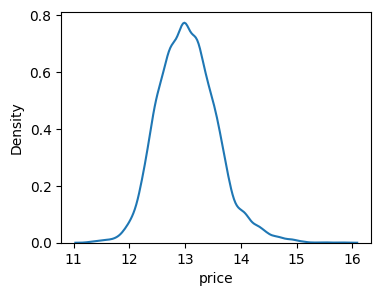

In [448]:
plt.figure(figsize=(4, 3))
sns.kdeplot(data=y)
plt.show()

In [449]:
# min max 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

## 2. 모델 학습

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# 손실 함수 정의
def rmse(y_test, y_pred):
    return root_mean_squared_error(y_test, np.expm1(y_pred)) # 로그 스케일 복원

In [451]:
# 모델별 scoring 함수
def get_scores(models, x, y):
    
    df = {}
    
    for model in models:
    
        model_name = model.__class__.__name__
        X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        score = rmse(y_test, y_pred)
        df[model_name] = score
        
        score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=True)
    return score_df

In [460]:
from sklearn.model_selection import RandomizedSearchCV

# 랜덤 서치
def random_search(model, train, y, param_distributions, cv, n_iter, verbose=1, n_jobs=5):
    random_model = RandomizedSearchCV(model, param_distributions=param_distributions,
                                scoring="neg_mean_squared_error",
                                cv=cv, n_iter=n_iter, verbose=verbose, n_jobs=n_jobs)
    random_model.fit(train, y)
    params = random_model.cv_results_["params"]
    scores = random_model.cv_results_["mean_test_score"]
    result_df = pd.DataFrame(data=params)
    result_df["score"] = scores
    result_df["RMSLE"] = np.sqrt(result_df["score"] * -1)
    result_df = result_df.sort_values("RMSLE", ascending=True)
    return result_df

In [461]:
# 머신러닝 모델 생성

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state = 2024

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state, verbose=-1)
rdforest = RandomForestRegressor(random_state=random_state)

models = [lightgbm, rdforest]

In [463]:
# setattr(pd, "Int64Index", pd.Index) # 버전 호환
# setattr(pd, "Float64Index", pd.Index)

param = {
    'n_estimators': range(10, 200),
    'max_depth': range(1, 20),
    'min_samples_leaf': range(1, 20)
}

# 모델별 랜덤 서치
for model in models:
    result = random_search(model=model, train=train, 
                                        y=y, param_distributions=param, 
                                        cv=3, n_iter=10, verbose=0, n_jobs=5)
    print(f"{model.__class__.__name__} Model score")
    print(result)

LGBMRegressor Model score
   n_estimators  min_samples_leaf  max_depth     score     RMSLE
0           186                15          7 -0.029827  0.172706
5           156                13         19 -0.030105  0.173507
3           137                 9         18 -0.030115  0.173536
9           159                 9          7 -0.030122  0.173555
8           159                 5         18 -0.030187  0.173743
1           181                 7         18 -0.030203  0.173792
6            86                14         10 -0.030685  0.175170
2            49                16         18 -0.032319  0.179774
4            53                 2          5 -0.033963  0.184290
7            18                16          8 -0.047853  0.218753
RandomForestRegressor Model score
   n_estimators  min_samples_leaf  max_depth     score     RMSLE
8           121                 1         17 -0.034221  0.184990
6            95                18         17 -0.038996  0.197475
2           167               

In [455]:
# n_estimators  min_samples_split  min_samples_leaf  max_depth
#       36              7                  2            11

In [456]:
# submission 제출 함수
def save_submission(model, train, y, test, model_name, rmsle):
    model.fit(train, y)
    y_pred = model.predict(test)
    y_pred = np.expm1(y_pred)
    
    submission_path = os.path.join(dir_path, "sample_submission.csv")
    submission = pd.read_csv(submission_path)
    submission["price"] = y_pred
    
    save_path = f"{dir_path}/submission_{model_name}_RMSLE_{rmsle}.csv"
    submission.to_csv(save_path, index=False)
    print(f"{save_path} saved.")

In [457]:
model = LGBMRegressor(n_estimators=36, max_depth=7, 
                            min_samples_split=2, min_samples_leaf=11, 
                            random_state=random_state)
save_submission(model, train, y, test, 'lgbm', rmsle='0.185822')

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2271
[LightGBM] [Info] Number of data points in the train set: 15035,